# CSE 6040 - Extra Credit Project: Exploring the different Data Sciene Job Salaries for the period 2020-2022

## I - Preparing the file for Analysis:

#### Import Libraries:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Upload the file for analysis:



In [2]:
all_data_df = pd.read_csv(r'C:\Users\ghadi\Downloads\ds_salaries.csv')

#### Making sure all the data has been uploaded properly:



In [3]:
# The data frame should have a total of 607 rows and 12 columns

print(len(all_data_df.index))
print(len(all_data_df.columns))

607
12


#### Inspecting the data frame:

In [4]:
all_data_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## II Performing some Data Cleaning:

#### Renaming some of the columns:

In [5]:
## adding the text ("_to_remove") next to the uneeded columns, that we will delete after we are done with the data-cleaning process

new_column_names = {'Unnamed: 0': 'Unnamed_to_remove',
                    'salary':'salary_in_LCL', 
                    'salary_in_usd': 'salary_in_usd_to_remove'}

all_data_df.rename(columns=new_column_names, inplace=True)

## Inspect the changes:
all_data_df.head()

,Unnamed_to_remove,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,salary_in_usd_to_remove,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Transforming the abbreviations inside the columns to their original name:


In [6]:
## At times, abbreviations used are unclear and confusing, changing them to their original name will make the table easier to read:

# 1-'experience_level' Column:

def experience_level(a):
    if a == 'EN':
        return 'Entry-level'
    elif a == 'MI':
        return 'Mid-level'
    elif a == 'SE':
        return 'Senior-level'
    elif a == 'EX':
        return 'Executive-level'
    
all_data_df['experience_level'] = all_data_df.experience_level.apply(lambda x: experience_level(x))


## Inspect the changes:
all_data_df.head()


,Unnamed_to_remove,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,salary_in_usd_to_remove,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Senior-level,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Senior-level,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Mid-level,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Senior-level,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# 2- 'employment_type' Column:

def employment_type(a):
    if a == 'FT':
        return 'Full-time'
    elif a == 'PT':
        return 'Part-time'
    elif a == 'CT':
        return 'Contract'
    elif a == 'FL':
        return 'Freelance'
    
all_data_df['employment_type'] = all_data_df.employment_type.apply(lambda x: employment_type(x))


## Inspect the changes:
all_data_df.head()

,Unnamed_to_remove,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,salary_in_usd_to_remove,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# 3- 'employee_residence' and 'employee_location' Columns: 
#N.B: We have 57 unique names, hence this code will be lengthy!
# The residency column follows the ISO 3166 country code, which can be easily identified using a quick google search
## Link used to get the country name from the ISO codes: "https://docs.dnb.com/partner/en-US/iso_country_codes"

### N.B!!: Please run the code cell only once, running it more than once, will cause the dataframe column to have empty values.
## In case, you find yourself needing to run the output again, use "Restart & Clear Output" then "Restart & run all".


def employee_residence_location(a):
    if a == 'AE':
        return 'United Arab Emirates'
    elif a == 'AR':
        return 'Argentina'
    elif a == 'AT':
        return 'Austria'
    elif a == 'AU':
        return 'Australia'
    elif a == 'BE':
        return 'Belgium'
    elif a == 'BG':
        return 'Bulgaria'
    elif a == 'BO':
        return 'Bolivia'    
    elif a == 'BR':
        return 'Brazil'
    elif a == 'CA':
        return 'Canada'
    elif a == 'CH':
        return 'Switzerland'
    elif a == 'CL':
        return 'Chile'
    elif a == 'CN':
        return 'China'
    elif a == 'CO':
        return 'Colombia' 
    elif a == 'CZ':
        return 'Czech Republic'
    elif a == 'DE':
        return 'Germany'
    elif a == 'DK':
        return 'Denmark'
    elif a == 'DZ':
        return 'Algeria'
    elif a == 'EE':
        return 'Estonia'
    elif a == 'ES':
        return 'Spain'    
    elif a == 'FR':
        return 'France'
    elif a == 'GB':
        return 'United Kingdom'
    elif a == 'GR':
        return 'Greece'
    elif a == 'HK':
        return 'Hong Kong'
    elif a == 'HN':
        return 'Honduras'
    elif a == 'HR':
        return 'Croatia'    
    elif a == 'HU':
        return 'Hungary'
    elif a == 'IE':
        return 'Ireland'
    elif a == 'IN':
        return 'India'
    elif a == 'IQ':
        return 'Iraq'
    elif a == 'IR':
        return 'Iran, Islamic Republic of'
    elif a == 'IT':
        return 'Italy'    
    elif a == 'JE':
        return 'Jersey'
    elif a == 'JP':
        return 'Japan'
    elif a == 'KE':
        return 'Kenya'
    elif a == 'LU':
        return 'Luxembourg'
    elif a == 'MD':
        return 'Moldova, Republic of'
    elif a == 'MT':
        return 'Malta' 
    elif a == 'MX':
        return 'Mexico'
    elif a == 'MY':
        return 'Malaysia'
    elif a == 'NG':
        return 'Nigeria'
    elif a == 'NL':
        return 'Netherlands'
    elif a == 'New Zealand':
        return 'NZ'
    elif a == 'PH':
        return 'Philippines'    
    elif a == 'PK':
        return 'Pakistan'
    elif a == 'PL':
        return 'Poland'
    elif a == 'PR':
        return 'Puerto Rico'
    elif a == 'PT':
        return 'Portugal'
    elif a == 'RO':
        return 'Romania'
    elif a == 'RS':
        return 'Republic of Serbia'  
    elif a == 'RU':
        return 'Russia Federation'
    elif a == 'SG':
        return 'Singapore'
    elif a == 'SI':
        return 'Slovenia'
    elif a == 'TN':
        return 'Tunisia'
    elif a == 'TR':
        return 'Turkey'
    elif a == 'UA':
        return 'Ukraine'    
    elif a == 'US':
        return 'United States'
    elif a == 'VN':
        return 'Vietnam'   
    
    
all_data_df['employee_residence'] = all_data_df.employee_residence.apply(lambda x: employee_residence_location(x))
all_data_df['company_location'] = all_data_df.company_location.apply(lambda y: employee_residence_location(y))


## Inspect the changes:
all_data_df.head()
# residency_counts = all_data_df['employee_residence'].value_counts()
# print(residency_counts)
residency_counts = all_data_df['employee_residence'].unique()
location_counts = all_data_df['company_location'].unique()
print('Residencies:', residency_counts)
print('Count:', len(residency_counts))
print('Locations:', residency_counts)
print('Count:', len(residency_counts))

Residencies: ['Germany' 'Japan' 'United Kingdom' 'Honduras' 'United States' 'Hungary'
 None 'France' 'India' 'Pakistan' 'Poland' 'Portugal' 'China' 'Greece'
 'United Arab Emirates' 'Netherlands' 'Mexico' 'Canada' 'Austria'
 'Nigeria' 'Philippines' 'Spain' 'Denmark' 'Russia Federation' 'Italy'
 'Croatia' 'Bulgaria' 'Singapore' 'Brazil' 'Iraq' 'Vietnam' 'Belgium'
 'Ukraine' 'Malta' 'Chile' 'Romania' 'Iran, Islamic Republic of'
 'Colombia' 'Moldova, Republic of' 'Kenya' 'Slovenia' 'Hong Kong' 'Turkey'
 'Republic of Serbia' 'Puerto Rico' 'Luxembourg' 'Jersey' 'Czech Republic'
 'Argentina' 'Algeria' 'Tunisia' 'Malaysia' 'Estonia' 'Australia'
 'Bolivia' 'Ireland' 'Switzerland']
Count: 57
Locations: ['Germany' 'Japan' 'United Kingdom' 'Honduras' 'United States' 'Hungary'
 None 'France' 'India' 'Pakistan' 'Poland' 'Portugal' 'China' 'Greece'
 'United Arab Emirates' 'Netherlands' 'Mexico' 'Canada' 'Austria'
 'Nigeria' 'Philippines' 'Spain' 'Denmark' 'Russia Federation' 'Italy'
 'Croatia' 'Bulga

Generated these two lists, just to make sure that we have 57 countries in the study, 
since displaying them in a dataframe format will output only a portion of the countries. 

In [9]:
# 4 - 'remote_ratio' Column:

def remote_ratio(a):
    if a == 0:
        return 'Less than 20%'
    elif a == 50:
        return 'Between 20% and 80%'
    elif a == 100:
        return 'More than 80%'
    
all_data_df['remote_ratio'] = all_data_df.remote_ratio.apply(lambda x: remote_ratio(x))

## Inspect the changes:
all_data_df.head()


,Unnamed_to_remove,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,salary_in_usd_to_remove,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,Germany,Less than 20%,Germany,L
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Less than 20%,Japan,S
2,2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Between 20% and 80%,United Kingdom,M
3,3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Less than 20%,Honduras,S
4,4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Between 20% and 80%,United States,L


In [10]:
# 5 - 'company_size' Column:

def company_size(a):
    if a == 'L':
        return 'Large'
    elif a == 'M':
        return 'Medium'
    elif a == 'S':
        return 'Small'
    
all_data_df['company_size'] = all_data_df.company_size.apply(lambda x: company_size(x))

## Inspect the changes:
all_data_df.head()

,Unnamed_to_remove,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,salary_in_usd_to_remove,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,Germany,Less than 20%,Germany,Large
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Less than 20%,Japan,Small
2,2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Between 20% and 80%,United Kingdom,Medium
3,3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Less than 20%,Honduras,Small
4,4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Between 20% and 80%,United States,Large


#### Calculate the Salary in USD based on the updated exchange rate:

In [11]:
#Even though we have a column with the Salary in USD, I will be recalculating that column based on the updated exchange rates

salary_currency = all_data_df['salary_currency'].unique()
print('salary_currency:', salary_currency)


salary_currency: ['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']


Updated exchange rates as of November 20, 2022:

USD - EUR = 0.97;   USD - GBP =  0.84; USD - HUF = 393.74;  USD - INR = 81.52  
USD - JPY = 140.34;  USD - CNY = 7.12;   USD - MXN = 19.44;   USD - CAD = 1.34  
USD - DKK = 7.20;   USD - PLN = 4.55;   USD - SGD = 1.38;   USD - CLP = 941.80  
USD - BRL = 5.38;   USD - TRY = 18.62;   USD - AUD = 1.50;   USD - CHF = 0.95

The reason why I chose to apply this step, is to standarize the exchange rate.   
When analyzing the salaries among the years, I want to eliminate the impact of changes in the exchange rate.  
I want to compare the salaries in nominal terms to check whether there has been an increase or decrease in the nominal value.


In [12]:
# 1 - Creating a new column with updated value in USD:


def salary_in_usd(row):
    if row['salary_currency'] == 'USD':
        return round(row['salary_in_LCL']/1.0,0)
    elif row['salary_currency'] == 'EUR':
        return round(row['salary_in_LCL']/0.97,0)
    elif row['salary_currency'] == 'GBP':
        return round(row['salary_in_LCL']/0.84, 0)
    elif row['salary_currency'] == 'HUF':
        return round(row['salary_in_LCL']/393.74, 0)
    elif row['salary_currency'] == 'INR':
        return round(row['salary_in_LCL']/81.52, 0)
    elif row['salary_currency'] == 'JPY':
        return round(row['salary_in_LCL']/140.34, 0)
    elif row['salary_currency'] == 'CNY':
        return round(row['salary_in_LCL']/7.12, 0)
    elif row['salary_currency'] == 'MXN':
        return round(row['salary_in_LCL']/19.44, 0)
    elif row['salary_currency'] == 'CAD':
        return round(row['salary_in_LCL']/1.34, 0)
    elif row['salary_currency'] == 'DKK':
        return round(row['salary_in_LCL']/7.20, 0)
    elif row['salary_currency'] == 'PLN':
        return round(row['salary_in_LCL']/4.55, 0)
    elif row['salary_currency'] == 'SGD':
        return round(row['salary_in_LCL']/1.38, 0)
    elif row['salary_currency'] == 'CLP':
        return round(row['salary_in_LCL']/941.80, 0)
    elif row['salary_currency'] == 'BRL':
        return round(row['salary_in_LCL']/5.38, 0)
    elif row['salary_currency'] == 'TRY':
        return round(row['salary_in_LCL']/18.62, 0)
    elif row['salary_currency'] == 'AUD':
        return round(row['salary_in_LCL']/1.50, 0)
    elif row['salary_currency'] == 'CHF':
        return round(row['salary_in_LCL']/0.95, 0)


all_data_df['salary_in_usd'] = all_data_df.apply(salary_in_usd, axis=1)
all_data_df['salary_in_usd'] = all_data_df['salary_in_usd'].astype('int') 

## Inspect the changes:
all_data_df.head()



,Unnamed_to_remove,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,salary_in_usd_to_remove,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,Germany,Less than 20%,Germany,Large,72165
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Less than 20%,Japan,Small,260000
2,2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Between 20% and 80%,United Kingdom,Medium,101190
3,3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Less than 20%,Honduras,Small,20000
4,4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Between 20% and 80%,United States,Large,150000


#### Remove the unnecessary columns:

In [13]:
#  We arrive at the final step in the cleaning process, where we will remove the unwanted columns:

all_data_df.drop(['Unnamed_to_remove', 'salary_in_usd_to_remove'], axis=1, inplace = True)

## Inspect the changes:
all_data_df.head()


,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,Germany,Less than 20%,Germany,Large,72165
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,Japan,Less than 20%,Japan,Small,260000
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,United Kingdom,Between 20% and 80%,United Kingdom,Medium,101190
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,Honduras,Less than 20%,Honduras,Small,20000
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,United States,Between 20% and 80%,United States,Large,150000


## III Data Analysis

Now that we have cleaned the data and created a clear and updated table, we can start with our analysis.

#### 1 - High Level Overview:

In [14]:
## a - Looking at the overall sales per year:


Total_Annual_Sales = all_data_df.groupby('work_year')['salary_in_usd'].sum().to_frame().reset_index()
Total_Number_Employed = all_data_df.groupby('work_year')['salary_in_usd'].count().to_frame().reset_index()

High_Level_Overview_Table = pd.merge(Total_Annual_Sales, Total_Number_Employed, on = 'work_year')

High_Level_Overview_Table.columns = ['year', 'Total_Annual_Salary', 'Total_Number_of_Employees']

High_Level_Overview_Table.style



,year,Total_Annual_Salary,Total_Number_of_Employees
0,2020,6716101,72
1,2021,20931024,217
2,2022,39214972,318


Over the years, the gross salary amount increased, so did the number of employees.  
It is to no surpise, since the Data Science Field had been gaining in popularity.

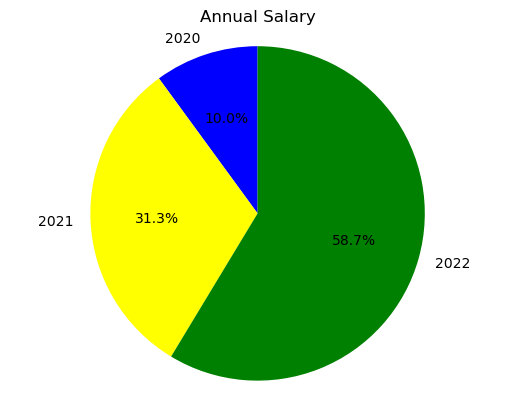

In [15]:
labels= ['2020', '2021', '2022']

colors=['blue', 'yellow', 'green']

sizes= [6716101, 20931024, 39214972]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.title('Annual Salary')

plt.axis('equal')

plt.show()

This pie chart shows the salary evolution over the years:
2022 constituted close to 60% of the total Data Scientist Salary for the three year period 2020 - 2022.
Also, it is important to note that this number might be higher, since the year is not over yet.

In [16]:
## b - Looking at the most popular roles for the three year period:

values = all_data_df['job_title'].value_counts(dropna=False).keys().tolist()
counts = all_data_df['job_title'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))
total = sum(value_dict.values())

print('Employees per Job Title in decreasing order:', value_dict)
print()
print('Total Employees:', total)
print()
print('Total Job Titles:', len(value_dict))


Employees per Job Title in decreasing order: {'Data Scientist': 143, 'Data Engineer': 132, 'Data Analyst': 97, 'Machine Learning Engineer': 41, 'Research Scientist': 16, 'Data Science Manager': 12, 'Data Architect': 11, 'Big Data Engineer': 8, 'Machine Learning Scientist': 8, 'Principal Data Scientist': 7, 'AI Scientist': 7, 'Data Science Consultant': 7, 'Director of Data Science': 7, 'Data Analytics Manager': 7, 'ML Engineer': 6, 'Computer Vision Engineer': 6, 'BI Data Analyst': 6, 'Lead Data Engineer': 6, 'Data Engineering Manager': 5, 'Business Data Analyst': 5, 'Head of Data': 5, 'Applied Data Scientist': 5, 'Applied Machine Learning Scientist': 4, 'Head of Data Science': 4, 'Analytics Engineer': 4, 'Data Analytics Engineer': 4, 'Machine Learning Developer': 3, 'Machine Learning Infrastructure Engineer': 3, 'Lead Data Scientist': 3, 'Computer Vision Software Engineer': 3, 'Lead Data Analyst': 3, 'Data Science Engineer': 3, 'Principal Data Engineer': 3, 'Principal Data Analyst': 2, 

Looking at the above dictionary, out of a total of 607 employees, it is clear that the top three popular job titles in Data Science are as follows:  
1- Data Scientist: 143 employee  
2- Data Engineer: 132 employee  
3- Data Analyst: 97 employee

These top three profession consitute around 61% (372 out of 607) of all the job titles between 2020 and 2022.

In [17]:
## Plot a bar chart to visualize the difference, however first we need to organize the data:


## Create two varriables:

Top_3_Titles = sum(list(value_dict.values())[0:3])
print("Total number of employees in the top three job titles:", Top_3_Titles)
Rest = sum(list(value_dict.values())[3:])
print("Total number of employees in the rest of the job tites:", Rest)

Total number of employees in the top three job titles: 372
Total number of employees in the rest of the job tites: 235


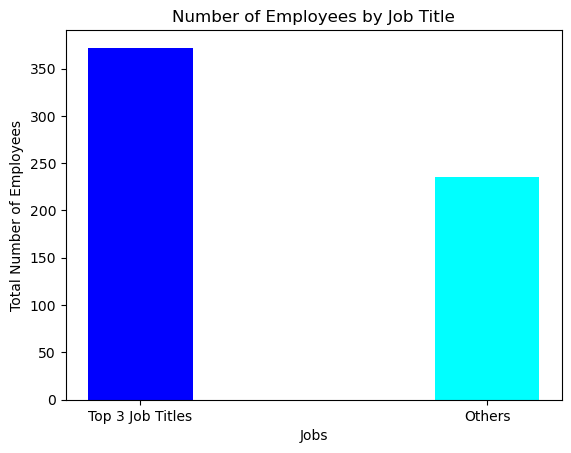

In [18]:
## Creating the bar chart:

x = np.array(["Top 3 Job Titles", "Others"])
y = np.array([Top_3_Titles, Rest])

plt.title('Number of Employees by Job Title')
plt.xlabel('Jobs')
plt.ylabel('Total Number of Employees')


plt.bar(x,y, align='center', width= [0.3, 0.3], color = ['blue', 'cyan'])

plt.show()

In [19]:
# c - Looking at the Salaries based on seniority (experience level):

df_experience_level =  all_data_df.groupby('experience_level')['salary_in_usd'].sum().to_frame().reset_index()
df_number_employed = all_data_df.groupby('experience_level')['salary_in_usd'].count().to_frame().reset_index()

df_seniority = pd.merge(df_experience_level, df_number_employed, on = 'experience_level')

df_seniority.columns = ['Experience_level', 'Total_Salary', 'Number_of_Employees']

df_seniority['Average_Salary_per_Employee'] = round((df_seniority['Total_Salary'] // df_seniority['Number_of_Employees']),0)

df_seniority.sort_values(by=['Average_Salary_per_Employee'], ignore_index=True, ascending=False, inplace = True)

df_seniority.style


,Experience_level,Total_Salary,Number_of_Employees,Average_Salary_per_Employee
0,Executive-level,5091108,26,195811
1,Senior-level,38445533,280,137305
2,Mid-level,18084677,213,84904
3,Entry-level,5240779,88,59554


It is to no surprise the order in which the salaries are displayed; 
with the executive level having the highest pay on average, followed by the senior level, then the mid level and finally the entry level.  
However, what is surprising is the number of employees, where the senior level had the highest number of employees and the entry level being palced before last.  
This suggest that several people going into analytics, have a lot of year of experience and specializing in a niche area.  
But this hypothesis, requires further analysis with different data than what is provided in this dataset.

#### 2 - Diving deeper into each year separately:

We will create a table fo each year (3 tables in total) in order to calculate the below information:  
1 - Total nuber of employees per year  
2 - Total number of employees per job title for a specific year  
3 - Total Salary per year  
4 - Total Salary per job title for a specific year


In [20]:
# 2020 Table:

df_2020 = all_data_df[(all_data_df['work_year']) == 2020]
df_2020.style

,work_year,experience_level,employment_type,job_title,salary_in_LCL,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,Germany,Less than 20%,Germany,Large,72165
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,Japan,Less than 20%,Japan,Small,260000
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,United Kingdom,Between 20% and 80%,United Kingdom,Medium,101190
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,Honduras,Less than 20%,Honduras,Small,20000
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,United States,Between 20% and 80%,United States,Large,150000
5,2020,Entry-level,Full-time,Data Analyst,72000,USD,United States,More than 80%,United States,Large,72000
6,2020,Senior-level,Full-time,Lead Data Scientist,190000,USD,United States,More than 80%,United States,Small,190000
7,2020,Mid-level,Full-time,Data Scientist,11000000,HUF,Hungary,Between 20% and 80%,Hungary,Large,27937
8,2020,Mid-level,Full-time,Business Data Analyst,135000,USD,United States,More than 80%,United States,Large,135000
9,2020,Senior-level,Full-time,Lead Data Engineer,125000,USD,None,Between 20% and 80%,None,Small,125000


In [21]:
## creating a new table with the data grouped by job title:

df_jobs_2020 = df_2020.groupby(['job_title'])['job_title'].count().to_frame().rename(columns={'job_title':'Number_of_Employees_2020'})

df_jobs_2020['Total_Salary_2020'] = df_2020.groupby(['job_title'])['salary_in_usd'].sum()

df_jobs_2020.sort_values(by=['Number_of_Employees_2020'], ascending = False, inplace = True)

df_jobs_2020['Average_Salary_per_Employee_2020'] = round((df_jobs_2020['Total_Salary_2020'] // df_jobs_2020['Number_of_Employees_2020']),0)

df_jobs_2020.reset_index(inplace = True)

df_jobs_2020

,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020
0,Data Scientist,21,1729968,82379
1,Data Engineer,11,931504,84682
2,Data Analyst,7,313788,44826
3,Machine Learning Engineer,5,621231,124246
4,Big Data Engineer,3,274283,91427
5,Research Scientist,2,492000,246000
6,Business Data Analyst,2,235000,117500
7,Product Data Analyst,2,25520,12760
8,Data Engineering Manager,2,125772,62886
9,Data Science Consultant,2,108189,54094


We will be performing the same task for 2021 and 2022 sperately, before joining the three tables on the column 'job_title'

In [22]:
## Table for 2021 following the same previous steps:

df_2021 = all_data_df[(all_data_df['work_year']) == 2021]

df_jobs_2021 = df_2021.groupby(['job_title'])['job_title'].count().to_frame().rename(columns={'job_title':'Number_of_Employees_2021'})

df_jobs_2021['Total_Salary_2021'] = df_2021.groupby(['job_title'])['salary_in_usd'].sum()

df_jobs_2021.sort_values(by=['Number_of_Employees_2021'], ascending = False, inplace = True)

df_jobs_2021['Average_Salary_per_Employee_2021'] = round((df_jobs_2021['Total_Salary_2021'] // df_jobs_2021['Number_of_Employees_2021']),0)

df_jobs_2021.reset_index(inplace = True)

df_jobs_2021

,job_title,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021
0,Data Scientist,45,3022760,67172
1,Data Engineer,32,2550006,79687
2,Machine Learning Engineer,18,1274622,70812
3,Data Analyst,17,1323001,77823
4,Research Scientist,10,773541,77354
5,Data Science Manager,6,844936,140822
6,Director of Data Science,5,789134,157826
7,Data Science Consultant,5,340515,68103
8,Principal Data Scientist,5,1173546,234709
9,Big Data Engineer,5,118566,23713


In [23]:
## 2022 Table:

df_2022 = all_data_df[(all_data_df['work_year']) == 2022]

df_jobs_2022 = df_2022.groupby(['job_title'])['job_title'].count().to_frame().rename(columns={'job_title':'Number_of_Employees_2022'})

df_jobs_2022['Total_Salary_2022'] = df_2022.groupby(['job_title'])['salary_in_usd'].sum()

df_jobs_2022.sort_values(by=['Number_of_Employees_2022'], ascending = False, inplace = True)

df_jobs_2022['Average_Salary_per_Employee_2022'] = round((df_jobs_2022['Total_Salary_2022'] // df_jobs_2022['Number_of_Employees_2022']),0)

df_jobs_2022.reset_index(inplace = True)

df_jobs_2022

,job_title,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,Data Engineer,89,11102041,124742
1,Data Scientist,77,10399696,135060
2,Data Analyst,73,7312319,100168
3,Machine Learning Engineer,18,2286116,127006
4,Data Architect,8,1456613,182076
5,Data Science Manager,5,850983,170196
6,Research Scientist,4,412454,103113
7,Data Analytics Manager,4,509940,127485
8,Analytics Engineer,4,700000,175000
9,Applied Data Scientist,3,714000,238000


Looking at the index columnm, it is obvious that there were new added jobs and removed jobs throughout the years.
Given that we are looking to calculate the growth rate and salary changes throught the years in study, we will be performing a left join on the 2020 table.  
That way, we will be only accounting for the jobs that have been present throughout the three year period.


In [40]:
## Left join on 2020 table:

final_df = df_jobs_2020.merge(df_jobs_2021, how='left', on='job_title').merge(df_jobs_2022, how='left', on='job_title')

final_df.dropna(inplace = True)

final_df.reset_index(inplace = True)

final_df

,index,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,0,Data Scientist,21,1729968,82379,45.0,3022760.0,67172.0,77.0,10399696.0,135060.0
1,1,Data Engineer,11,931504,84682,32.0,2550006.0,79687.0,89.0,11102041.0,124742.0
2,2,Data Analyst,7,313788,44826,17.0,1323001.0,77823.0,73.0,7312319.0,100168.0
3,3,Machine Learning Engineer,5,621231,124246,18.0,1274622.0,70812.0,18.0,2286116.0,127006.0
4,5,Research Scientist,2,492000,246000,10.0,773541.0,77354.0,4.0,412454.0,103113.0
5,6,Business Data Analyst,2,235000,117500,1.0,51546.0,51546.0,2.0,84338.0,42169.0
6,10,Lead Data Engineer,2,181000,90500,3.0,525286.0,175095.0,1.0,111940.0,111940.0
7,12,Principal Data Scientist,1,134021,134021,5.0,1173546.0,234709.0,1.0,152577.0,152577.0
8,13,Machine Learning Scientist,1,260000,260000,4.0,582000.0,145500.0,3.0,425300.0,141766.0
9,15,Machine Learning Infrastructure Engineer,1,45361,45361,1.0,195000.0,195000.0,1.0,54639.0,54639.0


Comparing the index columns, it is clear that over the course of the three years, there have been changes in the job titles created in the field (given that there has been only 15 jobs that remained over the course of the three years).  
1- Data Analysts: It includes 'Data Analyst' and 'Business Data Analyst'  
2- Data Scientist: It includes 'Data Scientist', 'Principal Data Scientist', 'Data Science Manager' and 'Director of Data Science'. However, I will omit the Manager and Director, as these two jobs have a really high salary and for Senior employees with many years of experience. Including them, will inflate and depict an inaccurate picture of how much Data Scientists starting out, get paid.   
3- Data Engineers: It includes 'Data Engineer' and 'Lead Data Engineer'  
4- Machine Learning: It includes 'Machine Learning Engineer and ML Engineer', 'Machine Learning Scientist', 'Machine Learning Infrastructure Engineer'  
5- Others: It includes 'Research Scientist', 'AI Scientist' and 'Computer Vision Engineer'


We will create separate tables for each category stated above:  
Step 1: Sum the values of the rows that are included in each category    
Step 2: Transpose the data, to have the desired table format  
Step 3: Change the name of the job title to the desired name


In [25]:
## Data Analyst Table:
#Step 1:
Data_Analysts_df = final_df.loc[[2, 5]].sum().to_frame()
#Step 2:
Data_Analysts_df = Data_Analysts_df.transpose()
#Step 3:
Data_Analysts_df.job_title = Data_Analysts_df.job_title.replace('Data AnalystBusiness Data Analyst', 'Data Analysts')
Data_Analysts_df.style

,index,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,8,Data Analysts,9,548788,162326,18.000000,1374547.000000,129369.000000,75.000000,7396657.000000,142337.000000


In [26]:
## Data Scientits Table:
#Step 1:
Data_Scientists_df = final_df.loc[[0, 7]].sum().to_frame()
#Step 2:
Data_Scientists_df = Data_Scientists_df.transpose()
#Step 3:
Data_Scientists_df.job_title = Data_Scientists_df.job_title.replace('Data ScientistPrincipal Data Scientist', 'Data Scientists')
Data_Scientists_df.style

,index,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,12,Data Scientists,22,1863989,216400,50.000000,4196306.000000,301881.000000,78.000000,10552273.000000,287637.000000


In [27]:
## Data Engineers Table:
#Step 1:
Data_Engineers_df = final_df.loc[[1, 6]].sum().to_frame()
#Step 2:
Data_Engineers_df = Data_Engineers_df.transpose()
#Step 3:
Data_Engineers_df.job_title = Data_Engineers_df.job_title.replace('Data EngineerLead Data Engineer', 'Data Engineers')
Data_Engineers_df.style

,index,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,11,Data Engineers,13,1112504,175182,35.000000,3075292.000000,254782.000000,90.000000,11213981.000000,236682.000000


In [28]:
## Machine Learning Table:
#Step 1:
Machine_Learning_df = final_df.loc[[3, 8, 9, 11]].sum().to_frame()
#Step 2:
Machine_Learning_df = Machine_Learning_df.transpose()
#Step 3:
Machine_Learning_df.job_title = Machine_Learning_df.job_title.replace('Machine Learning EngineerMachine Learning ScientistMachine Learning Infrastructure EngineerML Engineer', 'Machine Learning')
Machine_Learning_df.style

,index,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,48,Machine Learning,8,941025,444040,27.000000,2688068.000000,570423.000000,23.000000,2786674.000000,344030.000000


In [29]:
## Others Table:
#Step 1:
Others_df = final_df.loc[[4, 10, 13]].sum().to_frame()
#Step 2:
Others_df = Others_df.transpose()
#Step 3:
Others_df.job_title = Others_df.job_title.replace('Research ScientistAI ScientistComputer Vision Engineer', 'Others')
Others_df.style

,index,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
0,42,Others,4,593667,347667,17.000000,936876.000000,123851.000000,8.000000,867454.000000,330613.000000


In [41]:
## Now, we will merge the 5 separate tables into a single one, which is straightforward gievn that they all contain the same columns:

res_df = pd.concat([Data_Analysts_df, Data_Scientists_df, Data_Engineers_df, Machine_Learning_df, Others_df  ], axis=0)

res_df.reset_index(inplace = True)

## Drop the unnecessary columns:
res_df.drop(columns=['level_0', 'index'], inplace = True)

## change the float type to integer type, just for aesthetics, since the numbers are all whole followed by six 0's after the comma: 
res_df['Number_of_Employees_2020'] = res_df['Number_of_Employees_2020'].astype('Int64') 
res_df['Total_Salary_2020'] = res_df['Total_Salary_2020'].astype('Int64')
res_df['Average_Salary_per_Employee_2020'] = res_df['Average_Salary_per_Employee_2020'].astype('Int64')

res_df['Number_of_Employees_2021'] = res_df['Number_of_Employees_2021'].astype('Int64') 
res_df['Total_Salary_2021'] = res_df['Total_Salary_2021'].astype('Int64')
res_df['Average_Salary_per_Employee_2021'] = res_df['Average_Salary_per_Employee_2021'].astype('Int64')

res_df['Number_of_Employees_2022'] = res_df['Number_of_Employees_2022'].astype('Int64') 
res_df['Total_Salary_2022'] = res_df['Total_Salary_2022'].astype('Int64')
res_df['Average_Salary_per_Employee_2022'] = res_df['Average_Salary_per_Employee_2022'].astype('Int64')

res_df.sort_values(by='Average_Salary_per_Employee_2022', inplace=True, ascending=False)

res_df.style

,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022
3,Machine Learning,8,941025,444040,27,2688068,570423,23,2786674,344030
4,Others,4,593667,347667,17,936876,123851,8,867454,330613
1,Data Scientists,22,1863989,216400,50,4196306,301881,78,10552273,287637
2,Data Engineers,13,1112504,175182,35,3075292,254782,90,11213981,236682
0,Data Analysts,9,548788,162326,18,1374547,129369,75,7396657,142337


Now we can calculate the annual growth rates for each variable:  
1- Number of Employees  
2- Total Salary  
3- Average Salary per Employee

In [31]:
res_df['Employee_Growth_Rate_2021'] = round(res_df['Number_of_Employees_2021']/res_df['Number_of_Employees_2020']*100,0).astype('int64')
res_df['Employee_Growth_Rate_2022'] = round(res_df['Number_of_Employees_2022']/res_df['Number_of_Employees_2021']*100,0).astype('int64')

res_df['Salary_Growth_Rate_2021'] = round(res_df['Total_Salary_2021']/res_df['Total_Salary_2020']*100,0).astype('int64')
res_df['Salary_Growth_Rate_2022'] = round(res_df['Total_Salary_2022']/res_df['Total_Salary_2021']*100,0).astype('int64')

res_df['Average_Salary_per_Employee_Growth_Rate_2021'] = round(res_df['Average_Salary_per_Employee_2021']/res_df['Average_Salary_per_Employee_2020']*100,0).astype('int64')
res_df['Average_Salary_per_Employee_Growth_Rate_2022'] = round(res_df['Average_Salary_per_Employee_2022']/res_df['Average_Salary_per_Employee_2021']*100,0).astype('int64')

res_df.style

,job_title,Number_of_Employees_2020,Total_Salary_2020,Average_Salary_per_Employee_2020,Number_of_Employees_2021,Total_Salary_2021,Average_Salary_per_Employee_2021,Number_of_Employees_2022,Total_Salary_2022,Average_Salary_per_Employee_2022,Employee_Growth_Rate_2021,Employee_Growth_Rate_2022,Salary_Growth_Rate_2021,Salary_Growth_Rate_2022,Average_Salary_per_Employee_Growth_Rate_2021,Average_Salary_per_Employee_Growth_Rate_2022
0,Data Analysts,9,548788,162326,18,1374547,129369,75,7396657,142337,200,417,250,538,80,110
1,Data Scientists,22,1863989,216400,50,4196306,301881,78,10552273,287637,227,156,225,251,140,95
2,Data Engineers,13,1112504,175182,35,3075292,254782,90,11213981,236682,269,257,276,365,145,93
3,Machine Learning,8,941025,444040,27,2688068,570423,23,2786674,344030,338,85,286,104,128,60
4,Others,4,593667,347667,17,936876,123851,8,867454,330613,425,47,158,93,36,267


In [32]:
## Create a new dataframe only with the growth rates for better visibility:

Growth_Rate_df = res_df[['job_title','Employee_Growth_Rate_2021', 'Employee_Growth_Rate_2022', 'Salary_Growth_Rate_2021', 'Salary_Growth_Rate_2022', 'Average_Salary_per_Employee_Growth_Rate_2021', 'Average_Salary_per_Employee_Growth_Rate_2022'  ]].copy()

Growth_Rate_df.style 

,job_title,Employee_Growth_Rate_2021,Employee_Growth_Rate_2022,Salary_Growth_Rate_2021,Salary_Growth_Rate_2022,Average_Salary_per_Employee_Growth_Rate_2021,Average_Salary_per_Employee_Growth_Rate_2022
0,Data Analysts,200,417,250,538,80,110
1,Data Scientists,227,156,225,251,140,95
2,Data Engineers,269,257,276,365,145,93
3,Machine Learning,338,85,286,104,128,60
4,Others,425,47,158,93,36,267


Since the growth rate is positive accross all categories and all variables, we can safely conclude that the Data Science field has been gaining in popularity among employees and employers and has been increasingly more in demand given the salary increases over the years.  

However, based on the data used in this study it is notable that the Data Scientists and Machine Learning jobs, have experiencing a notable slowdown in their growth compared to 2021.


##  IV Forecasting:

Given the annual growth rate calculated above, we can get an indication of what the salaries could be in 3 years time.
Since there is not enough years to find a pattern in the growth, and there is a huge fluctuation in the growth rate when comparing both years, we will take the average of both years as the annual growth rate and project it over a three year period.



In [33]:
growth_df = res_df[["job_title","Average_Salary_per_Employee_Growth_Rate_2021","Average_Salary_per_Employee_Growth_Rate_2022"]].copy()

growth_df["Average_Annual_Growth_Rate"] = round(res_df[["Average_Salary_per_Employee_Growth_Rate_2021","Average_Salary_per_Employee_Growth_Rate_2022"]].mean(axis = 1),0).astype('int64')

growth_df.style         

,job_title,Average_Salary_per_Employee_Growth_Rate_2021,Average_Salary_per_Employee_Growth_Rate_2022,Average_Annual_Growth_Rate
0,Data Analysts,80,110,95
1,Data Scientists,140,95,118
2,Data Engineers,145,93,119
3,Machine Learning,128,60,94
4,Others,36,267,152


We will create new columns that have the average monhtly Salary by simply dividing the average salary per employee by 12. 
The reason for this step, is to be able to plot the graph and show the monthly change in Salary.

In [34]:
monthly_salary_df = res_df[["job_title","Average_Salary_per_Employee_2022"]].copy()

monthly_salary_df["Average_Monthly_Salary_2022"] = round(res_df["Average_Salary_per_Employee_2022"]/12,0).astype('int64')

monthly_salary_df.style


,job_title,Average_Salary_per_Employee_2022,Average_Monthly_Salary_2022
0,Data Analysts,142337,11861
1,Data Scientists,287637,23970
2,Data Engineers,236682,19724
3,Machine Learning,344030,28669
4,Others,330613,27551


In [35]:
## We will create a dataframe with the average monthly growth rate, which we will use to forecast the growth rate in three years time.

forecasted_df = growth_df[["job_title","Average_Annual_Growth_Rate"]].copy()

forecasted_df = pd.merge(forecasted_df,monthly_salary_df, on = 'job_title')


## Calculating the monthly salary growth rate
forecasted_df["monthly_growth_rate"] = (1+forecasted_df["Average_Annual_Growth_Rate"])**(1/12) - 1

forecasted_df.style


,job_title,Average_Annual_Growth_Rate,Average_Salary_per_Employee_2022,Average_Monthly_Salary_2022,monthly_growth_rate
0,Data Analysts,95,142337,11861,0.462815
1,Data Scientists,118,287637,23970,0.489232
2,Data Engineers,119,236682,19724,0.490270
3,Machine Learning,94,344030,28669,0.461539
4,Others,152,330613,27551,0.520749


In order to plot the Salary line chart for each job title, we will need to create separate variables for each job title and perform the calculations on a monthly basis:
1- Calculate a separate Growth Rate for each job title
2- Calculate the Cumulative Growth Rate for each variable
3- From the Cumulative Growth Rate and 2022 Average Salary per Employee for each job title, we plot the chart using the Expected Monthly Salary formula.
4-The sum of each created array created for each job title will generate the total salary over the three years.

In [36]:
## Total Number of Months per Year
months = 12*3

## Set the monthly growth rate of each Job Title into its own variable:

Data_Analyst_Growth_Rate = forecasted_df.iloc[0]['monthly_growth_rate']/100 
Data_Scientist_Growth_Rate = forecasted_df.iloc[1]['monthly_growth_rate']/100 
Data_Engineer_Growth_Rate = forecasted_df.iloc[2]['monthly_growth_rate']/100
Machine_Learner_Growth_Rate = forecasted_df.iloc[3]['monthly_growth_rate']/100
Others_Growth_Rate = forecasted_df.iloc[4]['monthly_growth_rate']/100 

## Set the 2022 Average Salary per Employee of each Job Title into its own variable:

Data_Analyst_Starting_Salary = forecasted_df.iloc[0]['Average_Monthly_Salary_2022']
Data_Scientist_Starting_Salary = forecasted_df.iloc[1]['Average_Monthly_Salary_2022']
Data_Engineer_Starting_Salary = forecasted_df.iloc[2]['Average_Monthly_Salary_2022']
Machine_Learner_Starting_Salary = forecasted_df.iloc[3]['Average_Monthly_Salary_2022']
Others_Starting_Salary = forecasted_df.iloc[4]['Average_Monthly_Salary_2022']

## Calculate the cumulative growth rate for each variable separately and generate each monthly rate into 1-D numpy array:
Data_Analyst_Cum_Growth_Rate = np.cumprod(np.repeat(1 + Data_Analyst_Growth_Rate, months))

### Feel Free to print the below cells for a better visualization of what the above formula does:

# print(type(Data_Analyst_Cum_Growth_Rate))
# print(Data_Analyst_Cum_Growth_Rate.shape)
# print(Data_Analyst_Cum_Growth_Rate)

Data_Scientist_Cum_Growth_Rate = np.cumprod(np.repeat(1 + Data_Scientist_Growth_Rate, months))
Data_Engineer_Cum_Growth_Rate = np.cumprod(np.repeat(1 + Data_Engineer_Growth_Rate, months))
Machine_Learner_Cum_Growth_Rate = np.cumprod(np.repeat(1 + Machine_Learner_Growth_Rate, months))
Others_Cum_Growth_Rate = np.cumprod(np.repeat(1 + Others_Growth_Rate, months))

## Calculate the expected Salary and store each monthly salary for the three years period in a numpy array:

Data_Analyst_Expected_Salary = Data_Analyst_Starting_Salary*Data_Analyst_Cum_Growth_Rate

# print(Data_Analyst_Expected_Salary)

Data_Scientist_Expected_Salary = Data_Scientist_Starting_Salary*Data_Scientist_Cum_Growth_Rate
Data_Engineer_Expected_Salary = Data_Engineer_Starting_Salary*Data_Engineer_Cum_Growth_Rate
Machine_Learner_Expected_Salary = Machine_Learner_Starting_Salary*Machine_Learner_Cum_Growth_Rate
Others_Expected_Salary = Others_Starting_Salary*Others_Cum_Growth_Rate


print("The total average salary earned by a Data Analyst over the next three years is:$"+str(int(np.sum(Data_Analyst_Expected_Salary))))
print("The total average salary earned by a Data Scientist over the next three years is:$"+str(int(np.sum(Data_Scientist_Expected_Salary))))
print("The total average salary earned by a Data Engineer over the next three years is:$"+str(int(np.sum(Data_Engineer_Expected_Salary))))
print("The total average salary earned by a ML over the next three years is:$"+str(int(np.sum(Machine_Learner_Expected_Salary))))
print("The total average salary earned by the rest over the next three years is:$"+str(int(np.sum(Others_Expected_Salary))))

      


The total average salary earned by a Data Analyst over the next three years is:$465609
The total average salary earned by a Data Scientist over the next three years is:$945670
The total average salary earned by a Data Engineer over the next three years is:$778309
The total average salary earned by a ML over the next three years is:$1125145
The total average salary earned by the rest over the next three years is:$1093459


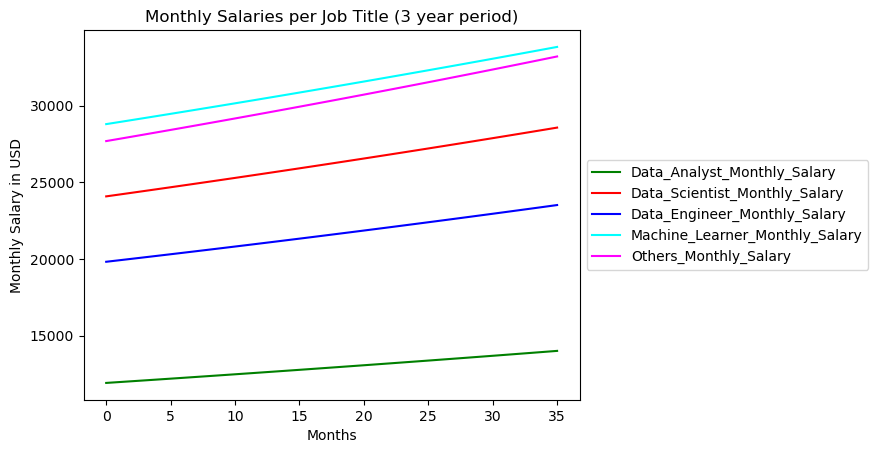

In [37]:
## Plot the chart:

# plt.plot(Data_Analyst_Expected_Salary, label ='y1')
# plt.plot(Data_Scientist_Expected_Salary, '-.', label ='y2')
# plt.plot(Data_Engineer_Expected_Salary, '-.', label ='y3')
# plt.plot(Machine_Learner_Expected_Salary, '-.', label ='y4')
# plt.plot(Others_Expected_Salary, '-.', label ='y5')

# plt.show()

fig, ax = plt.subplots()

ax.plot(Data_Analyst_Expected_Salary, color = 'green', label = 'Data_Analyst_Monthly_Salary')
ax.plot(Data_Scientist_Expected_Salary, color = 'red', label = 'Data_Scientist_Monthly_Salary')
ax.plot(Data_Engineer_Expected_Salary, color = 'blue', label = 'Data_Engineer_Monthly_Salary')
ax.plot(Machine_Learner_Expected_Salary, color = 'cyan', label = 'Machine_Learner_Monthly_Salary')
ax.plot(Others_Expected_Salary, color = 'magenta', label = 'Others_Monthly_Salary')

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.title('Monthly Salaries per Job Title (3 year period)')
plt.xlabel('Months')
plt.ylabel('Monthly Salary in USD')
plt.show()

This chart provides an indication of the trend of the Salary ranges among the different job titles.
It seems that the monthly salary increase is the highest among the "Others" group, which encompasses the Research Scientist, AI Scientist and Computer Vision Engineer.
I believe that these jobs are the ones with the lowest supply, which might explain the higher monthly salary raise, however we require further investigation to confirm that hypothesis.
As for the highest paid job in the Data Science field is for the ML, which is not surprising as it is the job that most often requires the most experience and higher academic degrees.

Nevertheless, it is important to note that this forecast is based on a linear model(i.e constant monthly salary increase), which is not an accurate represenation of the reality.
It is just to provide an indication and some sort of salaries expectations for prospective employees in the Data Science field.

### IV Conclusion and further Analysis:

Looking at the analysis, people have an indication of what salaies could be expected going nto the field and relatively which job pays the most, with the ML haveing the most attractive salary and the Data Analyst the lowest, whereas the Data Scientists lies somewhat between the two. This comes to no surpirse, given the job duties and qualifications that come with the roles.

The data set at hands, suggests that the growth rate in salary for 2022 compared to 2021 has declined for the Data Scientists, Data Engineers and ML, whereas it has increased for the Data Analysts and Others group, in addition to the employees growth rate which has declined accross all the Data Science fields except for the Data Analysts, suggesting a decline in the Data Science field at the high level.

However, we cannot conclude with certainty that the growth in the Data Science field has declined globally in 2022, as 2022 is not over yet, and we will need a larger sample data with more than 607 data points.

Nevertheless, if this were the case, could it be the result of the great resignation of 2021, triggered by COVID and increased mental health awareness, were among the millions who quite their jobs, a significant portion went into the Data Science field?

This question definetely requires larger data sets with different variables in order to analyze and present our findings.